In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Dataset directory
dataset_path = "dataset/"

df = pd.read_csv(os.path.join(dataset_path, "dataset.csv"))

print(f"Dataset shape: {df.shape}")
print()
print(f"Dataset columns: {df.columns}")
print()
print("Dataset data types:")
print(df.dtypes)

Dataset shape: (2000, 6)

Dataset columns: Index(['Patient_ID', 'Age', 'Num_Activities', 'Activity_Duration (days)',
       'Exercise_Adherence (%)', 'Progress'],
      dtype='object')

Dataset data types:
Patient_ID                    int64
Age                           int64
Num_Activities                int64
Activity_Duration (days)      int64
Exercise_Adherence (%)      float64
Progress                      int64
dtype: object


In [4]:
# Check for duplicates based on the specific columns
duplicates = df.duplicated(subset=["Age", "Num_Activities", "Activity_Duration (days)", "Exercise_Adherence (%)", "Progress"])

# Print the number of duplicates found
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


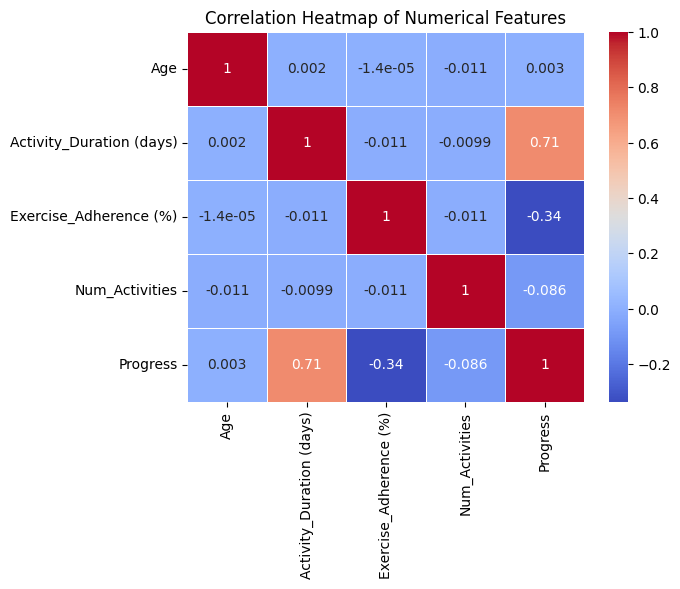

In [5]:
correlation_matrix = df[['Age', 'Activity_Duration (days)', 'Exercise_Adherence (%)', 'Num_Activities', 'Progress']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

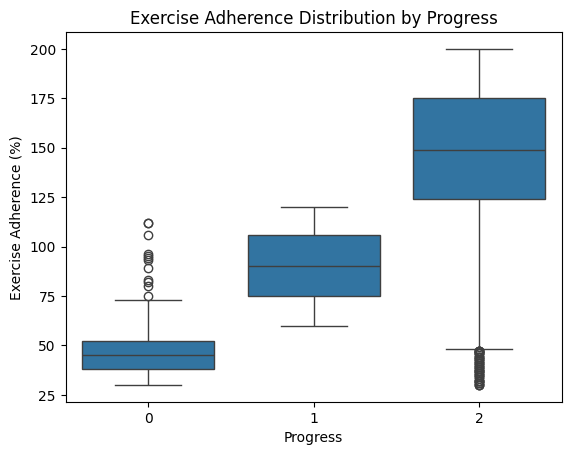

In [6]:
sns.boxplot(data=df, x='Progress', y='Activity_Duration (days)')
plt.title('Exercise Adherence Distribution by Progress')
plt.xlabel('Progress')
plt.ylabel('Exercise Adherence (%)')
plt.show()

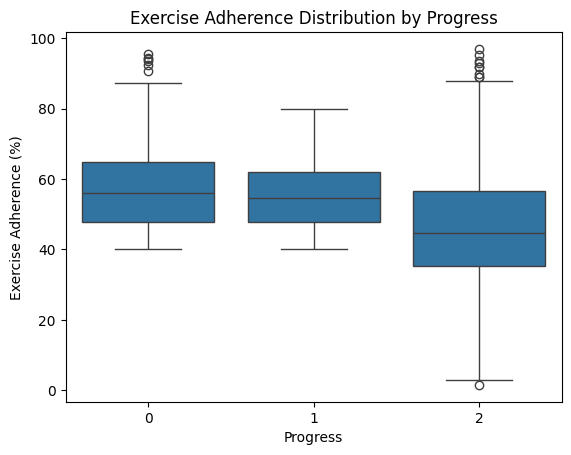

In [7]:
sns.boxplot(data=df, x='Progress', y='Exercise_Adherence (%)')
plt.title('Exercise Adherence Distribution by Progress')
plt.xlabel('Progress')
plt.ylabel('Exercise Adherence (%)')
plt.show()

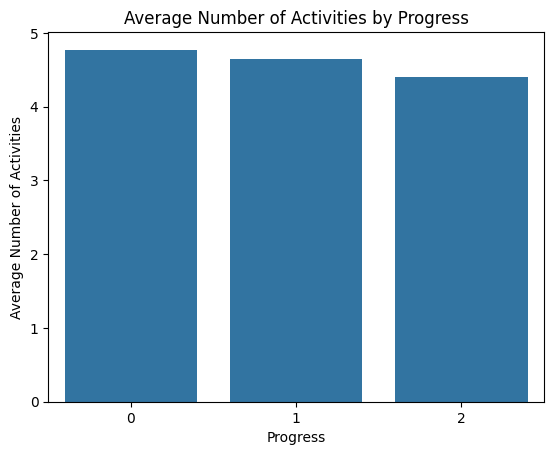

In [8]:
avg_activities = df.groupby('Progress')['Num_Activities'].mean().reset_index()

sns.barplot(data=avg_activities, x='Progress', y='Num_Activities')
plt.title('Average Number of Activities by Progress')
plt.xlabel('Progress')
plt.ylabel('Average Number of Activities')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# Define the feature columns (X) and target column (y)
X = df.drop(['Progress', 'Patient_ID'], axis=1) 
y = df['Progress']

# Split 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the resulting splits
print("Features data shape:")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print()
print("Target data shape:")
print("Training set shape:", y_train.shape)
print("Testing set shape:", y_test.shape)

Features data shape:
Training set shape: (1600, 4)
Testing set shape: (400, 4)

Target data shape:
Training set shape: (1600,)
Testing set shape: (400,)


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model with increased max_iter
log_reg = LogisticRegression(random_state=42, max_iter=200)
log_reg.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Perform cross-validation for Logistic Regression
cross_val_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
print(f"Logistic Regression Cross-Validation Scores: {cross_val_scores}")
print(f"Average Cross-Validation Score: {cross_val_scores.mean()}")

Logistic Regression Accuracy: 0.8225
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82        53
           1       0.68      0.66      0.67       107
           2       0.88      0.90      0.89       240

    accuracy                           0.82       400
   macro avg       0.81      0.78      0.79       400
weighted avg       0.82      0.82      0.82       400

Logistic Regression Cross-Validation Scores: [0.853125 0.80625  0.821875 0.815625 0.88125 ]
Average Cross-Validation Score: 0.835625


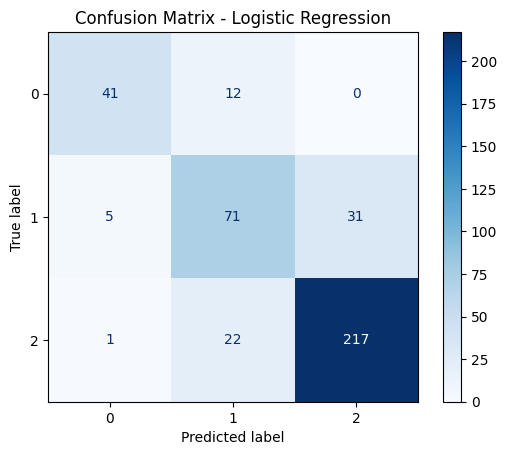

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [13]:
# Split 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Print the shapes of the resulting splits
print("Features data shape:")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print()
print("Target data shape:")
print("Training set shape:", y_train.shape)
print("Testing set shape:", y_test.shape)

Features data shape:
Training set shape: (1400, 4)
Testing set shape: (600, 4)

Target data shape:
Training set shape: (1400,)
Testing set shape: (600,)


In [14]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model with increased max_iter
log_reg = LogisticRegression(random_state=42, max_iter=200)
log_reg.fit(X_train_scaled, y_train)

# Predict and evaluate the model
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Perform cross-validation for Logistic Regression
cross_val_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
print(f"Logistic Regression Cross-Validation Scores: {cross_val_scores}")
print(f"Average Cross-Validation Score: {cross_val_scores.mean()}")

Logistic Regression Accuracy: 0.8283333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82        79
           1       0.69      0.68      0.68       160
           2       0.89      0.90      0.89       361

    accuracy                           0.83       600
   macro avg       0.81      0.79      0.80       600
weighted avg       0.83      0.83      0.83       600

Logistic Regression Cross-Validation Scores: [0.85357143 0.8        0.83214286 0.81785714 0.86071429]
Average Cross-Validation Score: 0.832857142857143


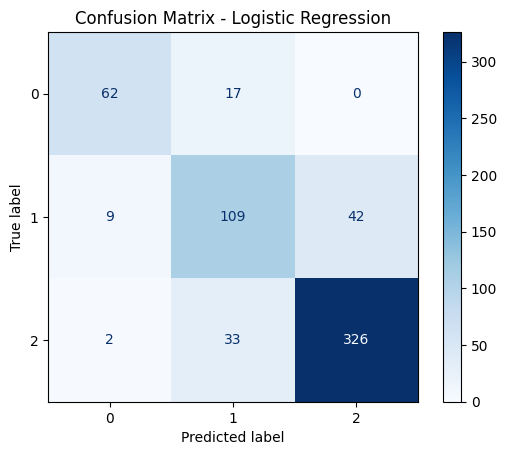

In [15]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [16]:
import joblib

# Create the /models directory if it doesn't exist
model_dir = "models"
os.makedirs(model_dir, exist_ok=True)

# Save the trained logistic regression model
model_path = os.path.join(model_dir, "logistic_regression.pkl")
joblib.dump(log_reg, model_path)

print(f"Logistic Regression model saved at: {model_path}")

Logistic Regression model saved at: models\logistic_regression.pkl


In [17]:
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Load the saved logistic regression model
model_path = "models/logistic_regression.pkl"
log_reg = joblib.load(model_path)

# Get the number of features from the model
num_features = log_reg.coef_.shape[1]  # Number of input features

# Define input shape correctly (Fix applied)
input_shape = FloatTensorType([None, num_features])

# Convert the model to ONNX format
onnx_model = convert_sklearn(log_reg, initial_types=[("input", input_shape)])

# Save the ONNX model
onnx_model_path = "models/logistic_regression.onnx"
with open(onnx_model_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

print(f"ONNX model saved at: {onnx_model_path}")

ONNX model saved at: models/logistic_regression.onnx


In [18]:
import onnx

# Load the optimized model
model = onnx.load("models/logistic_regression.onnx")

# Check if the model is valid
onnx.checker.check_model(model)
print("Model is valid and ready for deployment!")

Model is valid and ready for deployment!


In [19]:
import onnxoptimizer

# Load your ONNX model
model = onnx.load("models/logistic_regression.onnx")

# Define ONNX optimizations
optimizations = ["eliminate_deadend", "eliminate_identity", "eliminate_nop_dropout", 
                 "eliminate_nop_cast", "eliminate_nop_transpose"]

# Optimize the model
optimized_model = onnxoptimizer.optimize(model, optimizations)

# Save the optimized model
onnx.save(optimized_model, "models/logistic_regression_optimized.onnx")

print("✅ ONNX Model optimized for Android!")

✅ ONNX Model optimized for Android!
